No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


La probabilité de ruine de l'assurance est de 0.00%.


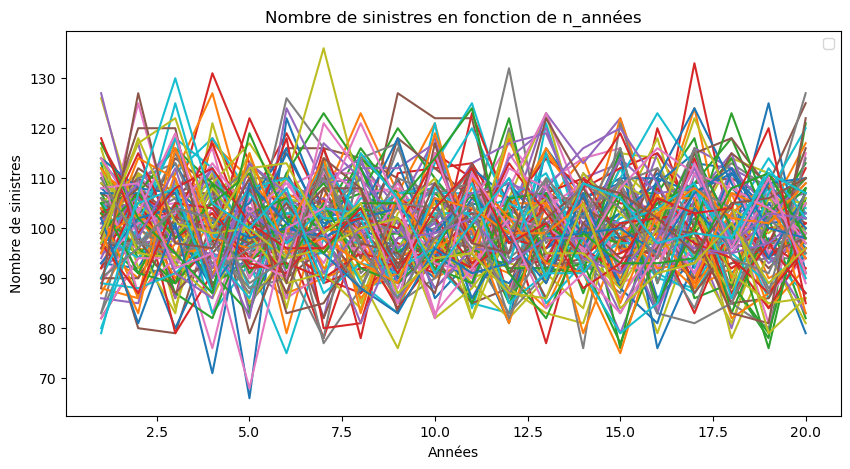

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


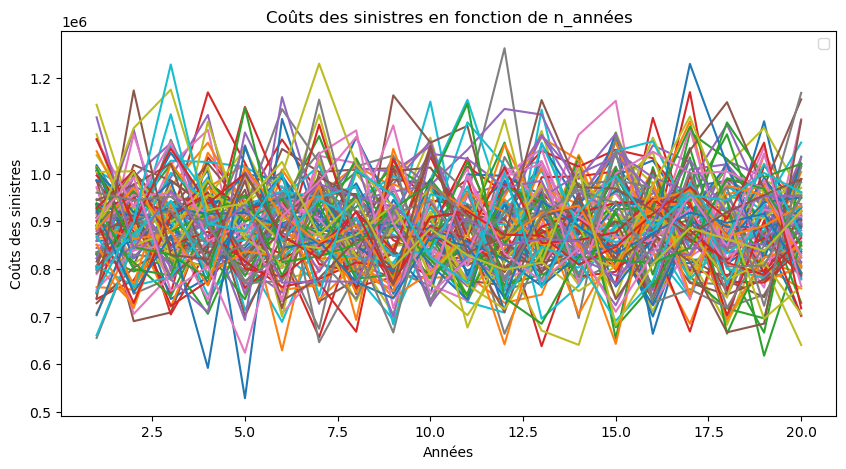

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


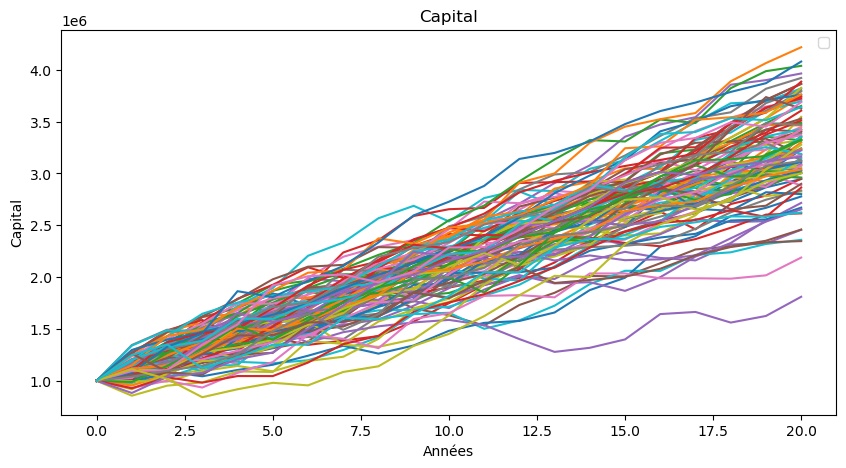

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la simulation
n_clients = 1000
p_sinistre = 0.1
n_annees = 20
capital_initial = 1000000
prime_annuelle = 1000000

alpha = 2
beta = 10000

M = 100  # nombre de simulations
A = np.zeros(M)
n_sinistres_all = np.zeros((n_annees, M)) # Stocker le nombre de réclamations pour chaque simulation
couts_total_all = np.zeros((n_annees, M)) # Stocker le coût total des réclamations pour chaque simulation
capital_all = np.zeros((n_annees+1, M)) # Stocker le capital à la fin de chaque année pour chaque simulation

for j in range(M):
    
    # Simulation des sinistres et des coûts associés
    n_sinistres = np.random.binomial(n_clients, p_sinistre, n_annees)
    n_sinistres_all[:, j] = n_sinistres # Stocker le nombre de réclamations pour cette simulation
    couts_sinistres = np.random.weibull(alpha, sum(n_sinistres)) * beta
    couts_total = np.zeros(n_annees)
    for i in range(n_annees):
        debut = np.sum(n_sinistres[:i])
        fin = np.sum(n_sinistres[:i+1])
        couts_total[i] = np.sum(couts_sinistres[debut:fin])
    couts_total_all[:, j] = couts_total # Stocker le coût total des sinistres pour cette simulation
    
    # Simulation du capital restant
    capital = np.zeros((n_annees+1, 1))
    capital[0] = capital_initial
    for i in range(n_annees):
        capital[i+1] = capital[i] + prime_annuelle - couts_total[i]
    capital_all[:, j] = capital[:, 0] # Stocker le capital à la fin de chaque année pour cette simulation
    
    # Calcul de la probabilité de ruine pour cette simulation
    a = np.where(capital[:, 0] < 0)[0]
    if len(a) == 0:
        A[j] = 0
    else:
        A[j] = 1
        
prob_ruine = np.mean(A)
print(f"La probabilité de ruine de l'assurance est de {prob_ruine:.2%}.")

# Tracer le nombre de réclamations au fil du temps pour les simulations
plt.figure(figsize=(10,5))
for i in range(M):
    plt.plot(np.arange(n_annees)+1, n_sinistres_all[:, i])
plt.xlabel("Années")
plt.ylabel("Nombre de sinistres")
plt.title("Nombre de sinistres en fonction de n_années")
plt.legend()
plt.show()

# Tracer le coût total des sinistres au fil du temps pour les simulations
plt.figure(figsize=(10,5))
for i in range(M):
    plt.plot(np.arange(n_annees)+1, couts_total_all[:, i])
plt.xlabel("Années")
plt.ylabel("Coûts des sinistres")
plt.title("Coûts des sinistres en fonction de n_années")
plt.legend()
plt.show()

# Tracer le capital au fil du temps pour les simulations
plt.figure(figsize=(10,5))
for i in range(M):
    plt.plot(np.arange(n_annees+1), capital_all[:, i])
plt.xlabel("Années")
plt.ylabel("Capital")
plt.title("Capital")
plt.legend()
plt.show()
